<a href="https://colab.research.google.com/github/AnanLu/hydrocode/blob/main/Q2/2_advection_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
#grid of space
Ngrid = 50
#grid of time
Nsteps = 1500

#dt and dx selected w/ trial and error to ensure stability 
#and show differences of diffusion coefficient
dt = 0.9
dx = 1

#coefficient for advection part
v = -0.1 #from ps5 statement
alpha = v*dt/2/dx

#coefficients to compare for diffusion part
D1 = 0.05
D2 = 0.5

beta1 = D1*dt/dx**2
beta2 = D2*dt/dx**2

#setting up initial condition
x = np.arange(Ngrid)*dx

f1 = np.copy(x)*1./Ngrid
f2 = np.copy(x)*1./Ngrid

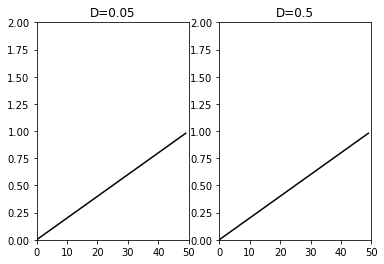

In [ ]:
#set up plot

fig, axes = plt.subplots(1,2)
axes[0].set_title('D=0.05')
axes[1].set_title('D=0.5')

axes[0].plot(x,f1,'k-')
axes[1].plot(x,f2,'k-')

for ax in axes:
    ax.set_xlim([0,Ngrid])
    ax.set_ylim([0,2])

line1, = axes[0].plot([], [], 'ro', lw=2)
line2, = axes[1].plot([], [], 'ro', lw=2)

In [ ]:
#set-up tri-diagonal matrix

A1 = np.eye(Ngrid)*(1+2*beta1)+np.eye(Ngrid, k=1)*(-beta1)+np.eye(Ngrid,k=-1)*(-beta1)
A1[0,0]=1
A1[0,1]=0
A1[-1,-1]=1+beta1
A2 = np.eye(Ngrid)*(1+2*beta2)+np.eye(Ngrid, k=1)*(-beta2)+np.eye(Ngrid,k=-1)*(-beta2)
A2[0,0]=1
A2[0,1]=0
A2[-1,-1]=1+beta2
print(A1)

[[ 1.     0.     0.    ...  0.     0.     0.   ]
 [-0.045  1.09  -0.045 ...  0.     0.     0.   ]
 [ 0.    -0.045  1.09  ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  1.09  -0.045  0.   ]
 [ 0.     0.     0.    ... -0.045  1.09  -0.045]
 [ 0.     0.     0.    ...  0.    -0.045  1.045]]


In [ ]:
# initialization function: set-up initial function for animation
def init():

    x = np.arange(Ngrid)*dx
    f1 = np.copy(x)*1./Ngrid
    f2 = np.copy(x)*1./Ngrid
    line1.set_data(x, f1)
    line2.set_data(x, f2)
    
    return (line1, line2)

In [ ]:
# animation function: implicit method
#this is basically a for loop updated in the animation function
def animate1(i):

    # D1=0.05
    # implicit method for diffusion
    f1[0:Ngrid] = np.linalg.solve(A1,f1[0:Ngrid])
    f1[0:Ngrid]=f1[0:Ngrid]/f1[-1]
    
    # advection
    f1[1:Ngrid-1] = 0.5*(f1[2:] + f1[:Ngrid-2]) - 0.5*alpha*(f1[2:]-f1[:Ngrid-2])

    # D2=0.5
    # implicit method for diffusion
    f2[0:Ngrid] = np.linalg.solve(A2,f2[0:Ngrid])
    f2[0:Ngrid]=f2[0:Ngrid]/f2[-1]
  
    # advection
    f2[1:Ngrid-1] = 0.5*(f2[2:] + f2[:Ngrid-2]) - 0.5*alpha*(f2[2:]-f2[:Ngrid-2])

    line1.set_data(x, f1)
    line2.set_data(x, f2)
    return (line1, line2)

In [ ]:
# animation function: explicit method
#this is basically a for loop updated in the animation function
def animate2(i):

    # D1=0.05
    # explicit method for diffusion
    f1[1:Ngrid-1] +=beta1*(f1[:Ngrid-2]+f1[2:]-2*f1[1:Ngrid-1])
    # advection
    f1[1:Ngrid-1] = 0.5*(f1[2:] + f1[:Ngrid-2]) - 0.5*alpha*(f1[2:]-f1[:Ngrid-2])

    # D2=0.5
    # explicit method for diffusion
    f2[1:Ngrid-1] +=beta2*(f2[:Ngrid-2]+f2[2:]-2*f2[1:Ngrid-1])
    # advection
    f2[1:Ngrid-1] = 0.5*(f2[2:] + f2[:Ngrid-2]) - 0.5*alpha*(f2[2:]-f2[:Ngrid-2])

    line1.set_data(x, f1)
    line2.set_data(x, f2)
    return (line1, line2)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
# frames=Nsteps is the number of time steps
# interval is time delay in milisecond
anim1 = animation.FuncAnimation(fig, animate1, init_func=init,
                               frames=Nsteps, interval=50, blit=True)

In [ ]:
# Demo of implicit method
# run the animation code and can be saved as mp4
HTML(anim1.to_html5_video())

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
# frames=Nsteps is the number of time steps
# interval is time delay in milisecond
anim2 = animation.FuncAnimation(fig, animate2, init_func=init,
                               frames=Nsteps, interval=20, blit=True)

In [ ]:
# Demo of explicit method
# run the animation code and can be saved as mp4
HTML(anim2.to_html5_video())